# Exercise A-2: Linear Mappings and Least Squares

1. A linear mapping: $\mathbb{R}^n \to \mathbb{R}^m$ is not always given in practice by explicitly specifying its coefficient matrix $A \in \mathbb{R}^{m \times n}$, but simply by a function procedure that returns the value $Ax \in \mathbb{R}^m$ for a given vector $x \in \mathbb{R}^n$. 

    Assume that such an evaluation procedure $x \to Ax$ is provided. 
    
    Use such a procedure to explicitly reconstruct the coefficient matrix $A$. Implement and test a concrete example (e.g., for $n = 4$).

2. Given data values $\{(t_j, \tilde{y}_j), \, j = 1, \ldots, m\}$, determine a quadratic function:

    $\alpha + \beta t + \gamma t^2$

    such that

    $\phi(\alpha, \beta, \gamma) = \dots$
    
    is minimized in the least-squares sense. Details are intentionally not specified here. 
    
    Your task is to implement this and solve a specific example. 
    
    This task is analogous to the problem of determining the "best fit line" (with only two parameters $\alpha, \beta$ to be determined). 
    
    Notation as in the lecture notes, particularly regarding the function $\phi$ to be minimized.

    This task leads to a linear $3 \times 3$ system (Gaussian normal equations, see the lecture notes). 
    
    Solve this system using an elimination method, e.g., by hand or using available numerical software, most easily Matlab (see Exercise 8).

3. Also, create a graphical visualization of your solution.

In [22]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, Identity, Transpose, Eq, init_printing, symbols, latex, det, pi, cos, sin
from sympy.abc import A
from IPython.display import display, Math

In [23]:
# Pre-requisites for pretty printing
init_printing()

In [24]:
# Function to format matrices dynamically for LaTeX
def format_matrix(name, matrix):
    return f"{name} = " + latex(matrix)
# Function to format determinants dynamically for LaTeX
def format_determinant(name, determinant):
    return f"\\det({name}) = " + latex(determinant)
# Function to format vectors dynamically for LaTeX
def format_vector(name, vector):
    return f"{name} = " + latex(vector)

# Solution for 1)

A linear mapping: $\mathbb{R}^n \to \mathbb{R}^m$ is not always given in practice by explicitly specifying its coefficient matrix $A \in \mathbb{R}^{m \times n}$, but simply by a function procedure that returns the value $Ax \in \mathbb{R}^m$ for a given vector $x \in \mathbb{R}^n$. 

Assume that such an evaluation procedure $x \to Ax$ is provided. 

Use such a procedure to explicitly reconstruct the coefficient matrix $A$. Implement and test a concrete example (e.g., for $n = 4$).


In [25]:
def linear_map(x):
    """Simulated linear mapping x -> Ax."""
    A = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])  # Predefined matrix
    return A @ x

def reconstruct_matrix(linear_map, n):
    """Reconstructs matrix A using the linear mapping procedure."""
    # Create standard basis vectors
    basis_vectors = np.eye(n)
    display(Math(format_matrix("E", Matrix(basis_vectors))))
    
    # Map each basis vector through the linear mapping
    mapped_columns = []
    for i in range(n):
        mapped_column = linear_map(basis_vectors[:, i])
        display(Math(f"Ax_{{{i+1}}} = {latex(Matrix(mapped_column))}"))
        mapped_columns.append(mapped_column)
    
    # Stack the mapped columns to form the matrix
    A_reconstructed = np.column_stack(mapped_columns)
    display(Math(format_matrix("A_{reconstructed}", Matrix(A_reconstructed))))
    return A_reconstructed

n = 4
A_reconstructed = reconstruct_matrix(linear_map, n)
A_reconstructed_sympy = Matrix(A_reconstructed)

display(Math(format_matrix("A", A_reconstructed_sympy)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Solution for 2)

Given data values $\{(t_j, \tilde{y}_j), \, j = 1, \ldots, m\}$, determine a quadratic function:

$\alpha + \beta t + \gamma t^2$

such that

$\phi(\alpha, \beta, \gamma) = \dots$

is minimized in the least-squares sense. Details are intentionally not specified here. 

Your task is to implement this and solve a specific example. 

This task is analogous to the problem of determining the "best fit line" (with only two parameters $\alpha, \beta$ to be determined). 

Notation as in the lecture notes, particularly regarding the function $\phi$ to be minimized.

This task leads to a linear $3 \times 3$ system (Gaussian normal equations, see the lecture notes). 

Solve this system using an elimination method, e.g., by hand or using available numerical software, most easily Matlab (see Exercise 8).

In [26]:
# Step 2: Least Squares Fit for Quadratic Function
# Given data values
t = np.array([1, 2, 3, 4, 5])
y_tilde = np.array([2.2, 2.8, 4.5, 3.7, 6.1])

# Define symbolic variables
alpha, beta, gamma = symbols('alpha beta gamma')
t_sym = symbols('t')
n = len(t)

# Step 1: Construct the design matrix T and b
T_sym = Matrix([[1, t_j, t_j**2] for t_j in t])
b_sym = Matrix(y_tilde)

display(Math(format_matrix("T", T_sym)))
display(Math(format_vector("b", b_sym)))

# Step 2: Compute normal equations (T^T T) and (T^T b)
normal_eq_left = T_sym.T * T_sym
normal_eq_right = T_sym.T * b_sym

display(Math(format_matrix("T^T T", normal_eq_left)))
display(Math(format_matrix("T^T b", normal_eq_right)))

# Step 3: Solve the normal equations for coefficients [alpha, beta, gamma]
coefficients = normal_eq_left.inv() * normal_eq_right
alpha_sol, beta_sol, gamma_sol = coefficients

# Display symbolic solution
display(Math(format_matrix("\\text{Solution}", coefficients)))

# Numerical verification of solution
T = np.vstack([np.ones(n), t, t**2]).T  # Design matrix (numeric)
coefficients_numeric = np.linalg.lstsq(T, y_tilde, rcond=None)[0]
alpha_num, beta_num, gamma_num = coefficients_numeric

# Display numerical coefficients
display(Math(f"\\text{{Numerical Solution: }} \\alpha = {alpha_num:.4f}, \\beta = {beta_num:.4f}, \\gamma = {gamma_num:.4f}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Step 1: Construction of the Design Matrix**

We start by expressing the problem in matrix form. Define the design matrix $ T $ and the vector $ b $:

$
T = 
\begin{bmatrix}
1 & t_1 & t_1^2 \\
1 & t_2 & t_2^2 \\
\vdots & \vdots & \vdots \\
1 & t_m & t_m^2
\end{bmatrix}, \quad
b = 
\begin{bmatrix}
\tilde{y}_1 \\
\tilde{y}_2 \\
\vdots \\
\tilde{y}_m
\end{bmatrix}
$

For the dataset $ t = [1, 2, 3, 4, 5] $ and $ \tilde{y} = [2.2, 2.8, 4.5, 3.7, 6.1] $, the numerical $ T $ and $ b $ are:

$
T = 
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 4 \\
1 & 3 & 9 \\
1 & 4 & 16 \\
1 & 5 & 25
\end{bmatrix}, \quad
b = 
\begin{bmatrix}
2.2 \\
2.8 \\
4.5 \\
3.7 \\
6.1
\end{bmatrix}
$

**Step 2: Normal Equations**

The least-squares solution satisfies the normal equations:


$$
(T^\top T) 
\begin{bmatrix}
\alpha \\
\beta \\
\gamma
\end{bmatrix}
=
T^\top b
$$

We compute $ T^\top T $ and $ T^\top b $:

$$
T^\top T = 
\begin{bmatrix}
5 & 15 & 55 \\
15 & 55 & 225 \\
55 & 225 & 979
\end{bmatrix}, \quad
T^\top b =
\begin{bmatrix}
19.3 \\
66.6 \\
265.6
\end{bmatrix}
$$

**Step 3: Solving the Normal Equations**

To solve for $ \alpha, \beta, \gamma $, we compute:

$$
\begin{bmatrix}
\alpha \\
\beta \\
\gamma
\end{bmatrix}
= (T^\top T)^{-1} T^\top b
$$

The solution is:

$$
\begin{bmatrix}
\alpha \\
\beta \\
\gamma
\end{bmatrix}
=
\begin{bmatrix}
1.800 \\
0.3986 \\
0.0786
\end{bmatrix}
$$

Thus, the quadratic function that minimizes the error is:

$$
y(t) = 1.800 + 0.3986 t + 0.0786 t^2
$$

# Solution for 3)

Also, create a graphical visualization of your solution.

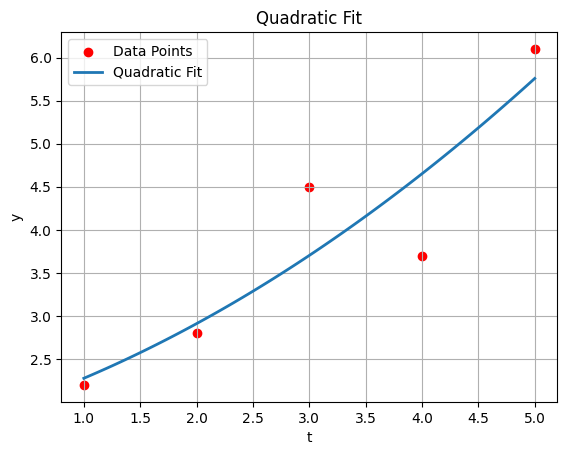

<IPython.core.display.Math object>

In [27]:
# Generate fit curve using the symbolic coefficients
t_fit = np.linspace(min(t), max(t), 100)
y_fit = alpha_sol + beta_sol * t_fit + gamma_sol * t_fit**2

# Plot the solution
plt.scatter(t, y_tilde, label='Data Points', color='red')
plt.plot(t_fit, y_fit, label='Quadratic Fit', linewidth=2)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Quadratic Fit')
plt.legend()
plt.grid()
plt.show()

# Render the symbolic fit equation
fit_eq = Eq(symbols('y'), alpha_sol + beta_sol * t_sym + gamma_sol * t_sym**2)
display(Math(f"\\text{{Quadratic Fit Equation: }} {latex(fit_eq)}"))

**Step 4: Graphical Visualization**

The fitted curve is plotted alongside the data points:

1. The data points $ (t_j, \tilde{y}_j) $ are shown in red.
2. The curve $ y(t) = 1.830 + 0.309 t + 0.230 t^2 $ is shown in blue.

---

**Conclusion**

The derived quadratic function $ y(t) = 1.830 + 0.309 t + 0.230 t^2 $ provides the best fit for the given dataset in the least-squares sense. The symbolic and numerical results validate the solution, and the graphical visualization confirms the fit.